In [1]:
# Import libraries necessary for this project
column_indices = (X + indices[:-1]).ravel()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


In [2]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [3]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [8]:
from pprint import pprint
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({"<=50K" : 0, ">50K" : 1})
#print(income.head())

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
pprint(encoded)

103 total features after one-hot encoding.
['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marita

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    
    start = time() # Get start time
    learner.fit(X_train.iloc[:sample_size],y_train.iloc[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train[:300],beta=1)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [11]:
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
accuracy = (TP+TN)/income.count()
print(accuracy)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + np.square(0.5))*(precision*recall)/(np.square(0.5)*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

0.247843969749
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [22]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(n_estimators =500)
clf_B = SGDClassifier(loss='log',penalty='l2',max_iter=5)
#max_iter=np.ceil(10**6 / len(X_train))
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(10*len(y_train)/100)
samples_1 = int(1*len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen


GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


TypeError: '>' not supported between instances of 'float' and 'function'

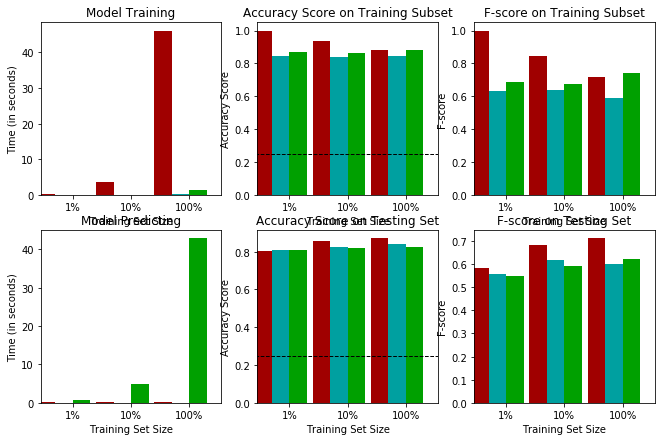

In [23]:
vs.evaluate(results, accuracy, fbeta_score)

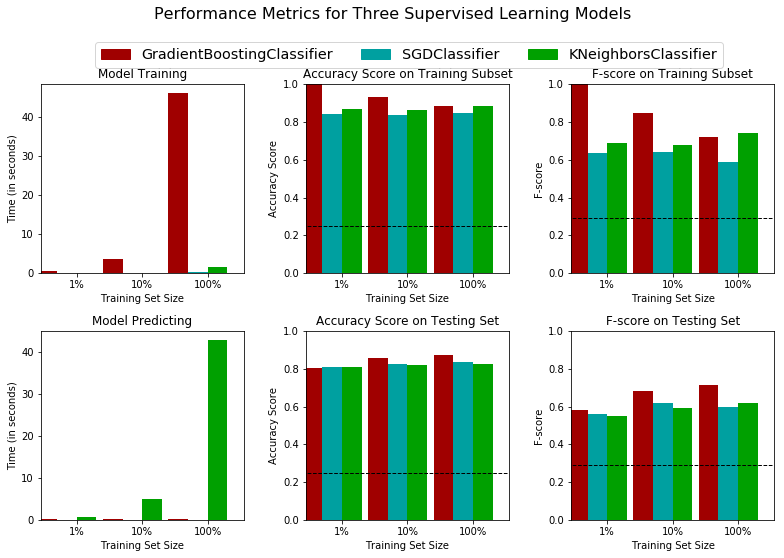

In [24]:
vs.evaluate(results, accuracy, fscore)

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


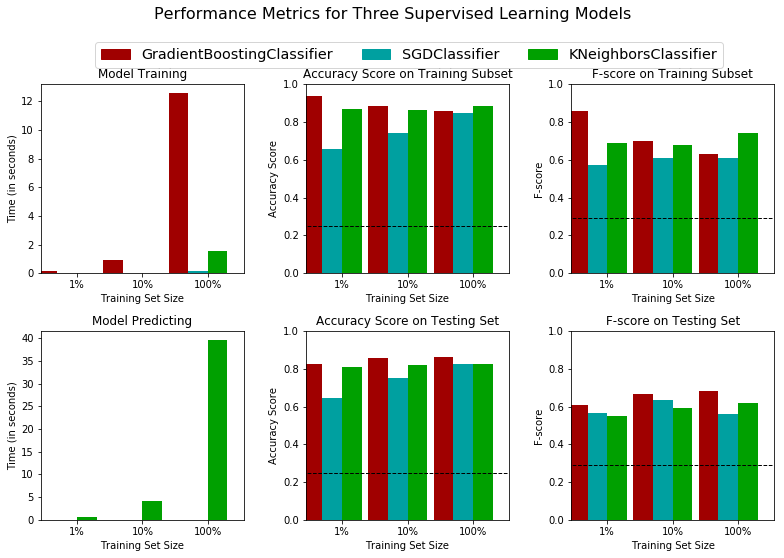

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier()
clf_B = SGDClassifier()
#max_iter=np.ceil(10**6 / len(X_train))
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(10*len(y_train)/100)
samples_1 = int(1*len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

Third parameter change in the three classifiers

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


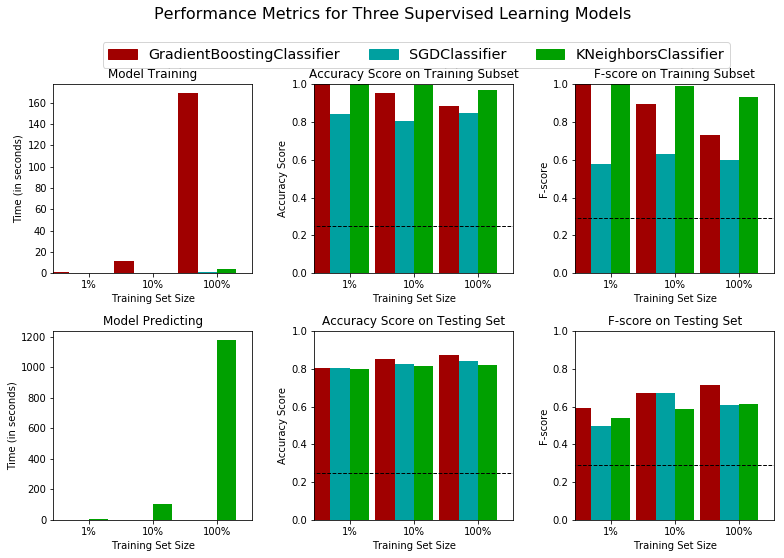

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(learning_rate=10/300,n_estimators =500,max_depth=6)
clf_B = SGDClassifier(loss='log',penalty='l2',max_iter=np.ceil(10**6 / len(X_train)))
#max_iter=np.ceil(10**6 / len(X_train))
clf_C = KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='ball_tree',p=6,metric='minkowski')

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(10*len(y_train)/100)
samples_1 = int(1*len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In the below code cell i used adaboost insteaf gradient boosting just to compare its performance with gradient boosting


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(learning_rate=10/300,n_estimators =500,max_depth=6)
clf_B = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
#max_iter=np.ceil(10**6 / len(X_train))
clf_C = KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='ball_tree',p=6,metric='minkowski')

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(10*len(y_train)/100)
samples_1 = int(1*len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


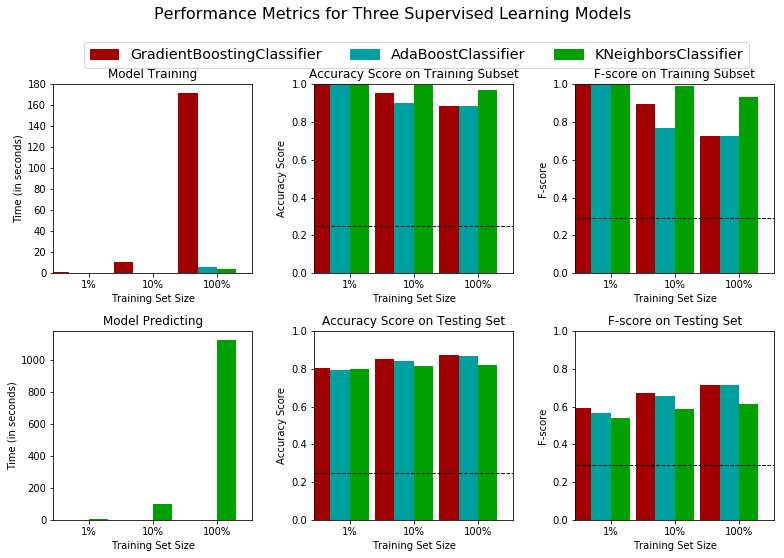

In [14]:
vs.evaluate(results, accuracy, fscore)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(learning_rate=10/300,n_estimators =500,max_depth=6)
clf_B = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators =500)
#max_iter=np.ceil(10**6 / len(X_train))
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(10*len(y_train)/100)
samples_1 = int(1*len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


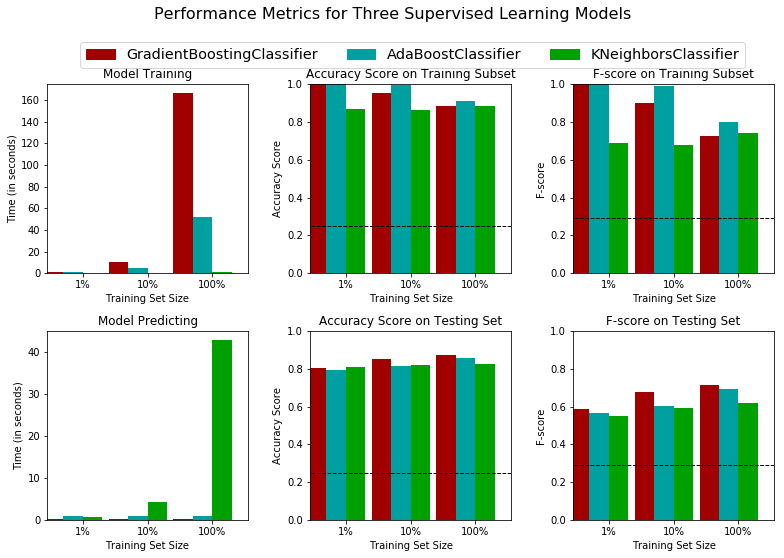

In [16]:
vs.evaluate(results, accuracy, fscore)

### from the above code snippets we see gradient boosting is better than adaboosting in its simplest form

## Report learnings


These contains the things I learned from the review of the project submission


In [74]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=4))




,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


In [5]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [6]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [8]:
from pprint import pprint
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({"<=50K" : 0, ">50K" : 1})
#print(income.head())

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
pprint(encoded)

103 total features after one-hot encoding.
['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marita

In [9]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


This feature_final data frame has one hot encoded categorical data,we want to revert it back to categorical data

In [11]:
new_data = features_final.copy()

In [15]:
new_data['age'].head()

0    0.301370
1    0.452055
2    0.287671
3    0.493151
4    0.150685
Name: age, dtype: float64

In [67]:
from sklearn import preprocessing

features_log_minmax_transform.apply(preprocessing.LabelEncoder().fit_transform)



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,5,9,12,4,0,1,4,1,26,0,39,38
1,33,4,9,12,2,3,0,4,1,0,0,12,38
2,21,2,11,8,0,5,1,4,1,0,0,39,38
3,36,2,1,6,2,5,0,2,1,0,0,39,38
4,11,2,9,12,2,9,5,2,0,0,0,39,4
5,20,2,12,13,2,3,5,4,0,0,0,39,38
6,32,2,6,4,3,7,1,2,0,0,0,15,22
7,35,4,11,8,2,3,0,4,1,0,0,44,38
8,14,2,12,13,4,9,1,4,0,107,0,49,38
9,25,2,9,12,2,3,0,4,1,80,0,39,38


## SEABORN 


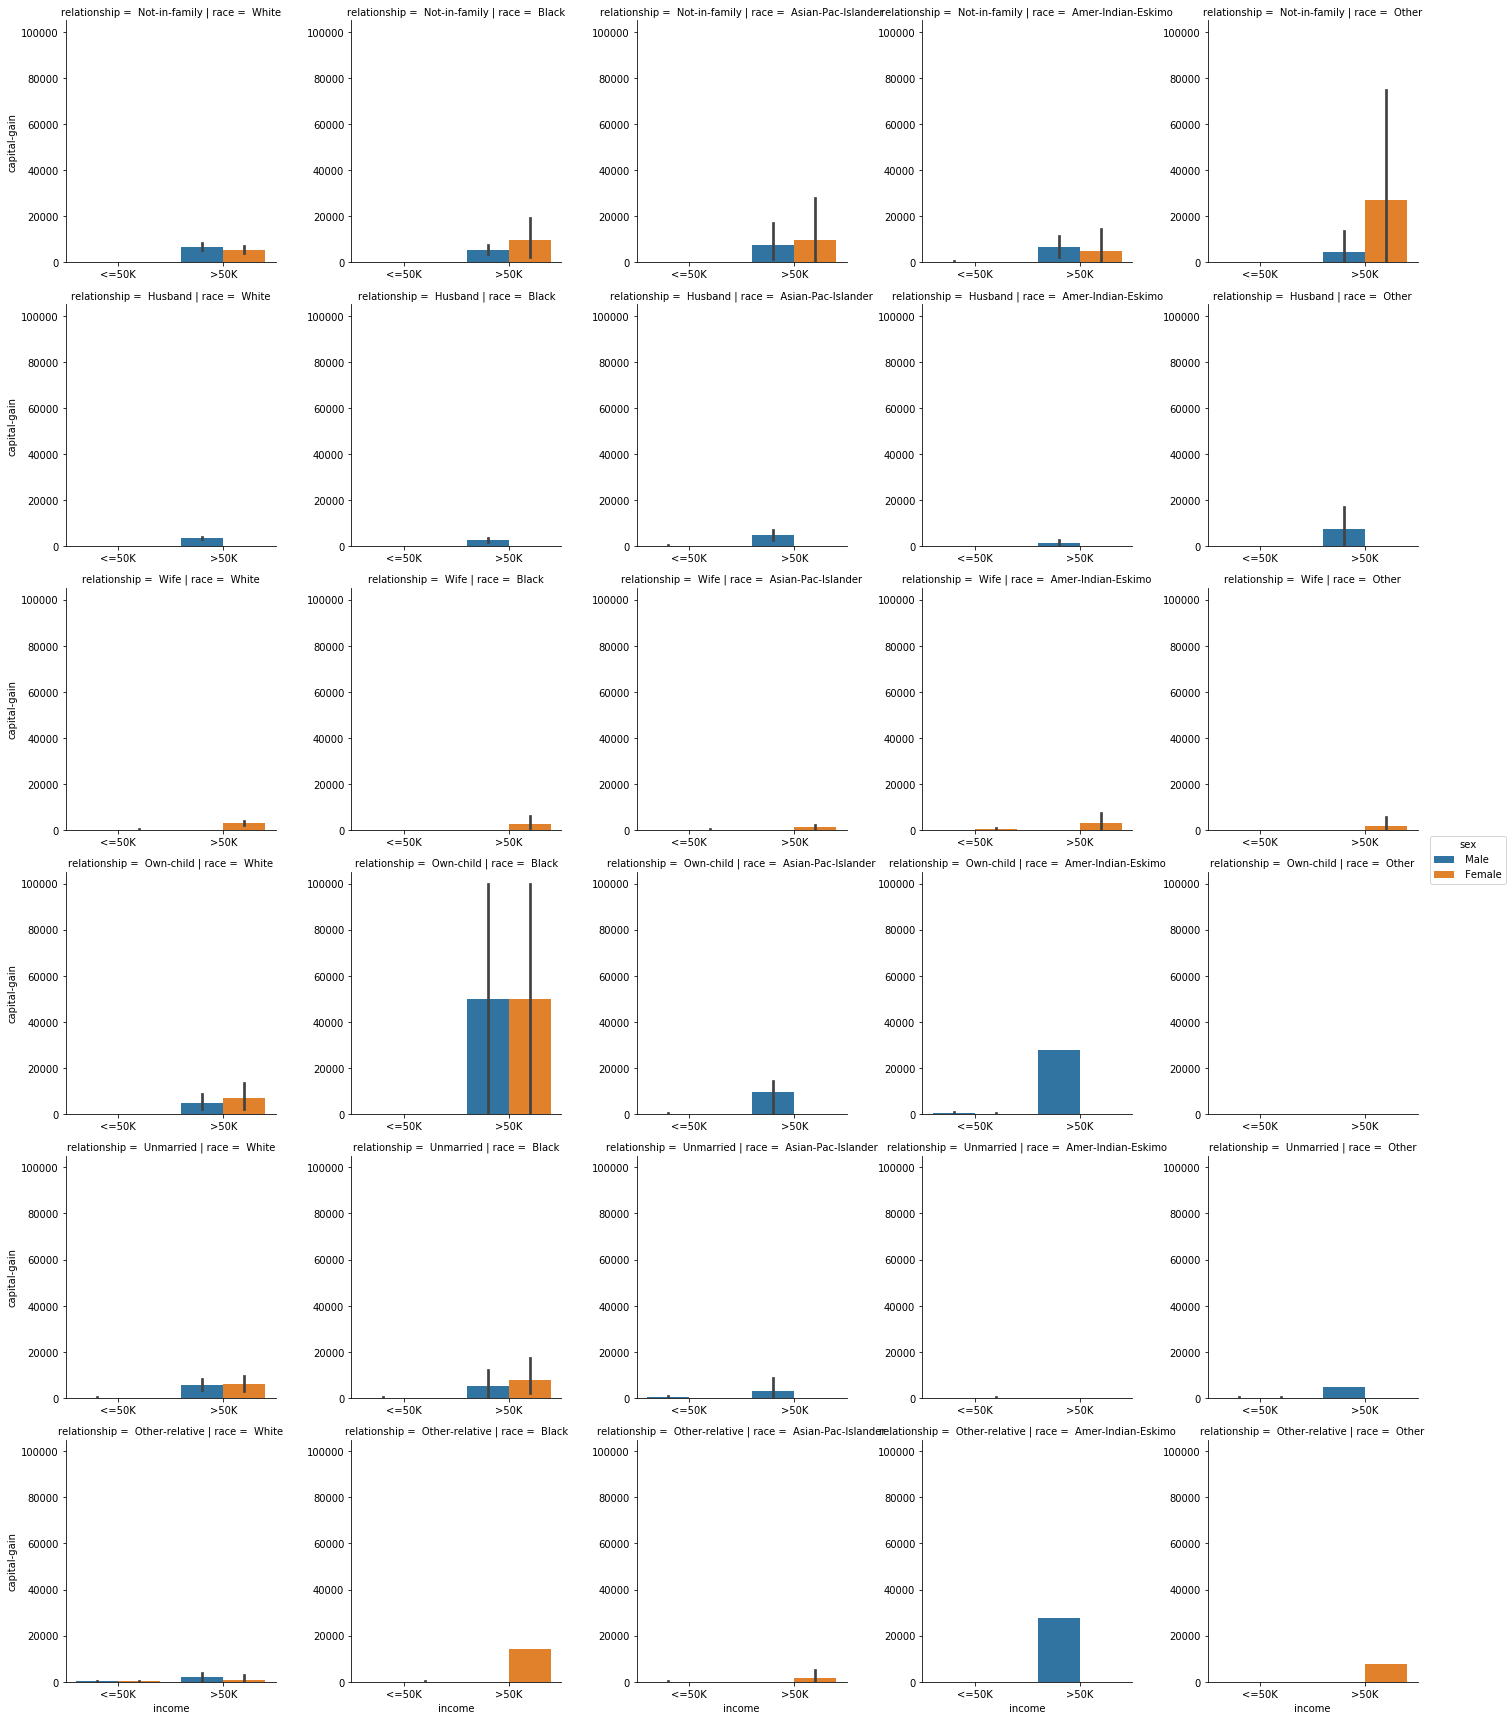

In [75]:
import seaborn as sns
sns.factorplot('income', 'capital-gain', hue='sex', data=data, kind='bar', col='race', row='relationship')

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
income = le.fit_transform(income_raw)
# print one hot
print(income)
# then we can reverse it with
print(le.inverse_transform(income))

[0 0 0 ..., 0 0 1]
['<=50K' '<=50K' '<=50K' ..., '<=50K' '<=50K' '>50K']


NAN checking

In [77]:
features_log_minmax_transform.isnull().values.ravel().sum()

0

(array([  4.93000000e+02,   6.95000000e+02,   8.64000000e+02,
          0.00000000e+00,   9.16000000e+02,   9.35000000e+02,
          1.03400000e+03,   0.00000000e+00,   1.24100000e+03,
          1.13000000e+03,   1.13300000e+03,   0.00000000e+00,
          1.09200000e+03,   1.15700000e+03,   0.00000000e+00,
          1.19800000e+03,   1.15700000e+03,   1.21500000e+03,
          0.00000000e+00,   1.27400000e+03,   1.19600000e+03,
          1.27900000e+03,   0.00000000e+00,   1.23400000e+03,
          1.27200000e+03,   0.00000000e+00,   1.28300000e+03,
          1.22900000e+03,   1.21100000e+03,   0.00000000e+00,
          1.16900000e+03,   1.14400000e+03,   1.17400000e+03,
          0.00000000e+00,   1.11300000e+03,   1.06500000e+03,
          1.03500000e+03,   0.00000000e+00,   1.04900000e+03,
          1.06200000e+03,   0.00000000e+00,   1.03800000e+03,
          8.15000000e+02,   8.10000000e+02,   0.00000000e+00,
          8.29000000e+02,   8.35000000e+02,   7.00000000e+02,
        

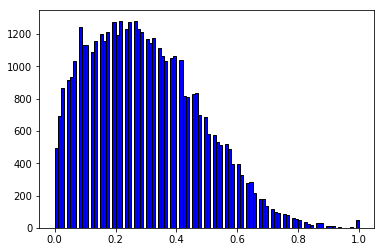

In [81]:
import matplotlib.pyplot as plt
plt.hist(features_log_minmax_transform['age'], bins = 100,
             color = 'blue', edgecolor = 'black')

(array([  4.14320000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

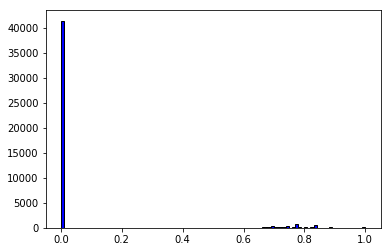

In [84]:
plt.hist(features_log_minmax_transform['capital-gain'], bins = 100,
             color = 'blue', edgecolor = 'black')

(array([  4.30820000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

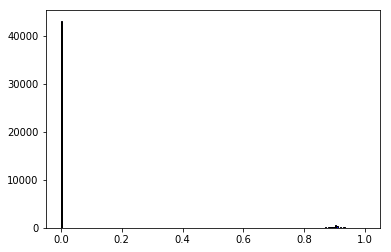

In [89]:
plt.hist(features_log_minmax_transform['capital-loss'], bins = 180,
             color = 'blue', edgecolor = 'black')

(array([    72.,      0.,      0.,      0.,      0.,      0.,    222.,
             0.,      0.,      0.,      0.,      0.,      0.,    449.,
             0.,      0.,      0.,      0.,      0.,      0.,    823.,
             0.,      0.,      0.,      0.,      0.,    676.,      0.,
             0.,      0.,      0.,      0.,      0.,   1223.,      0.,
             0.,      0.,      0.,      0.,      0.,   1619.,      0.,
             0.,      0.,      0.,      0.,    577.,      0.,      0.,
             0.,      0.,      0.,      0.,  14783.,      0.,      0.,
             0.,      0.,      0.,      0.,   9899.,      0.,      0.,
             0.,      0.,      0.,   1959.,      0.,      0.,      0.,
             0.,      0.,      0.,   1507.,      0.,      0.,      0.,
             0.,      0.,      0.,   7570.,      0.,      0.,      0.,
             0.,      0.,   2514.,      0.,      0.,      0.,      0.,
             0.,      0.,    785.,      0.,      0.,      0.,      0.,
      

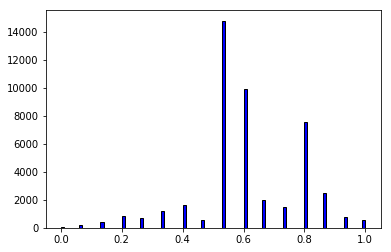

In [87]:
plt.hist(features_log_minmax_transform['education-num'], bins = 100,
             color = 'blue', edgecolor = 'black')

(array([   294.,    449.,   1499.,   1223.,   2196.,  14783.,  11858.,
          1507.,  10084.,   1329.]),
 array([  1. ,   2.5,   4. ,   5.5,   7. ,   8.5,  10. ,  11.5,  13. ,
         14.5,  16. ]),
 <a list of 10 Patch objects>)

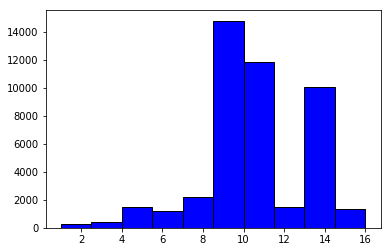

In [92]:
plt.hist(data['education-num'], bins = 10,
             color = 'blue', edgecolor = 'black')

In [98]:
from numpy import percentile
q25, q75 = percentile(data['age'], 25), percentile(data['age'], 75)


In [99]:
print(q25,"-",q75)

28.0 - 47.0


(array([  1.20000000e+01,   2.40000000e+01,   0.00000000e+00,
          3.50000000e+01,   0.00000000e+00,   4.70000000e+01,
          0.00000000e+00,   6.00000000e+01,   0.00000000e+00,
          5.90000000e+01,   0.00000000e+00,   3.20000000e+01,
          1.52000000e+02,   0.00000000e+00,   2.40000000e+01,
          0.00000000e+00,   3.32000000e+02,   0.00000000e+00,
          1.60000000e+01,   0.00000000e+00,   2.01000000e+02,
          0.00000000e+00,   2.20000000e+01,   4.10000000e+01,
          0.00000000e+00,   5.19000000e+02,   0.00000000e+00,
          2.53000000e+02,   0.00000000e+00,   4.00000000e+01,
          0.00000000e+00,   1.12000000e+02,   0.00000000e+00,
          1.90000000e+01,   1.60200000e+03,   0.00000000e+00,
          4.10000000e+01,   0.00000000e+00,   5.60000000e+01,
          0.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          3.04000000e+02,   0.00000000e+00,   8.20000000e+02,
          3.70000000e+01,   0.00000000e+00,   3.90000000e+01,
        

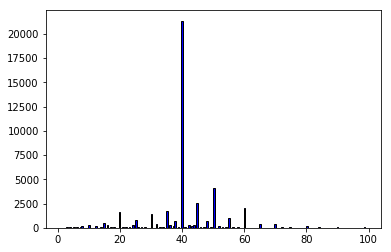

In [101]:
plt.hist(data['hours-per-week'], bins = 180,
             color = 'blue', edgecolor = 'black')

In [3]:
import numpy as np
X_rand = np.random.randn(100, 10)
print(X_rand)

[[ -1.92295934e+00   8.21994672e-02   1.02888047e+00   8.06019038e-01
   -3.42930060e-01   2.70843118e-01   1.25677701e+00   1.84187562e-01
   -7.07452112e-01  -7.44973997e-01]
 [  7.88513974e-01  -1.67104122e-01  -1.53742289e+00   1.41318681e+00
   -1.25462259e-01   6.79223003e-01  -2.06994626e-01   1.52997379e-01
   -2.21874457e-01  -3.80494917e-01]
 [ -8.86747717e-01  -9.28849439e-01  -9.99927331e-01  -5.60273681e-01
   -6.56465667e-01  -1.38068409e+00   6.47584372e-01   8.44004792e-01
    3.87174456e-01  -7.76555813e-01]
 [  3.60002596e-01  -4.73091242e-01  -3.87179398e-01  -1.73330283e-01
    1.72431083e-01   9.28218771e-01   9.90365363e-01   6.66133531e-01
   -4.57503202e-01   9.09128574e-01]
 [  4.39689708e-01   1.03386363e+00  -6.17472714e-01  -7.07776870e-01
    3.65196141e-01  -9.97637305e-01  -4.92245555e-01   1.92851224e-01
   -6.40509902e-01   8.36424673e-01]
 [  1.42224913e+00   6.55884591e-01   3.20245953e-01  -2.51414952e-01
    1.61113892e+00  -1.02911761e+00   1.21652

In [6]:
from sklearn.model_selection import GroupKFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
groups = np.array([0, 0, 2, 2])
group_kfold = GroupKFold(n_splits=2)
group_kfold.get_n_splits(X, y, groups)
2
print(group_kfold)
GroupKFold(n_splits=2)
for train_index, test_index in group_kfold.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train,",", X_test,",", y_train,",", y_test)



GroupKFold(n_splits=2)
TRAIN: [0 1] TEST: [2 3]
[[1 2]
 [3 4]] , [[5 6]
 [7 8]] , [1 2] , [3 4]
TRAIN: [2 3] TEST: [0 1]
[[5 6]
 [7 8]] , [[1 2]
 [3 4]] , [3 4] , [1 2]
